## Import Files

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import lightgbm as lgb

In [37]:
data = pd.read_csv('/content/Dataset.csv')

data.sample(10)

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
222,308,10.3,0.430,0.44,2.4,0.214,5.0,12.0,0.99940,3.19,0.63,9.500000,6
72,103,8.1,0.575,0.22,2.1,0.077,12.0,65.0,0.99670,3.29,0.51,9.200000,5
922,1299,7.6,1.580,0.00,2.1,0.137,5.0,9.0,0.99476,3.50,0.40,10.900000,3
424,595,8.9,0.595,0.41,7.9,0.086,30.0,109.0,0.99980,3.27,0.57,9.300000,5
962,1355,6.1,0.320,0.25,1.8,0.086,5.0,32.0,0.99464,3.36,0.44,10.100000,5
1083,1517,6.5,0.530,0.06,2.0,0.063,29.0,44.0,0.99489,3.38,0.83,10.300000,6
309,439,7.0,0.620,0.18,1.5,0.062,7.0,50.0,0.99510,3.08,0.60,9.300000,5
966,1359,11.6,0.475,0.40,1.4,0.091,6.0,28.0,0.99704,3.07,0.65,10.033333,6
267,378,11.4,0.625,0.66,6.2,0.088,6.0,24.0,0.99880,3.11,0.99,13.300000,6
670,950,8.9,0.120,0.45,1.8,0.075,10.0,21.0,0.99552,3.41,0.76,11.900000,7


## Checking Data

In [3]:
null_values = data.isnull().sum()
print(null_values)

Id                      0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [4]:
data.describe()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,804.969379,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,463.997116,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,0.000000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,411.000000,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,794.000000,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,1209.500000,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,1597.000000,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
data.shape

(1143, 13)

## Graphs (Correlation, Univariate, Bivariate)

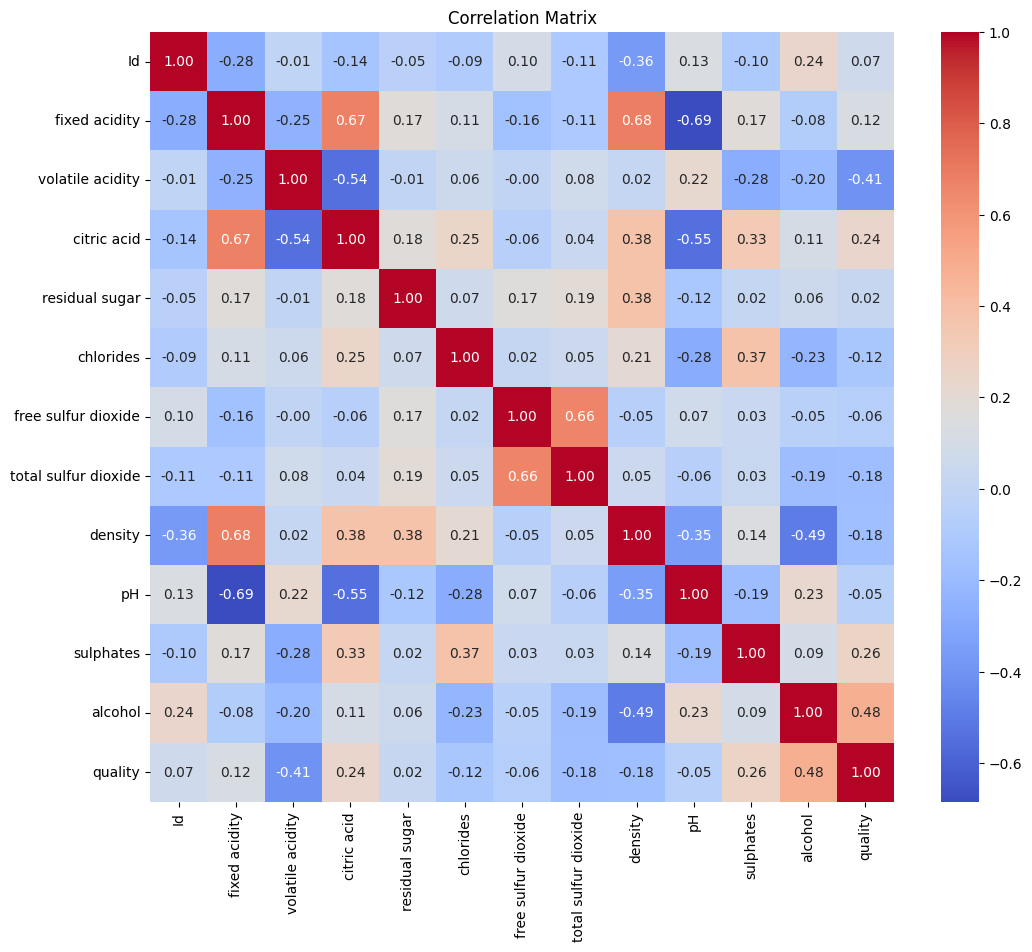

In [6]:
correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()

In [38]:
quality_correlation = correlation_matrix['quality'].abs().sort_values(ascending=False)
print(quality_correlation)

quality                 1.000000
alcohol                 0.484866
volatile acidity        0.407394
sulphates               0.257710
citric acid             0.240821
total sulfur dioxide    0.183339
density                 0.175208
chlorides               0.124085
fixed acidity           0.121970
Id                      0.069708
free sulfur dioxide     0.063260
pH                      0.052453
residual sugar          0.022002
Name: quality, dtype: float64


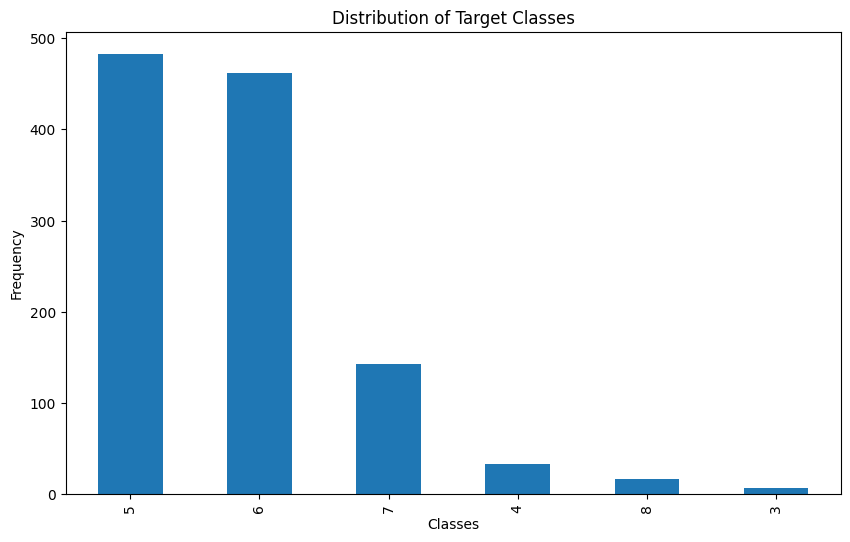

In [39]:
plt.figure(figsize=(10, 6))
data['quality'].value_counts().plot(kind='bar')
plt.title('Distribution of Target Classes')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()

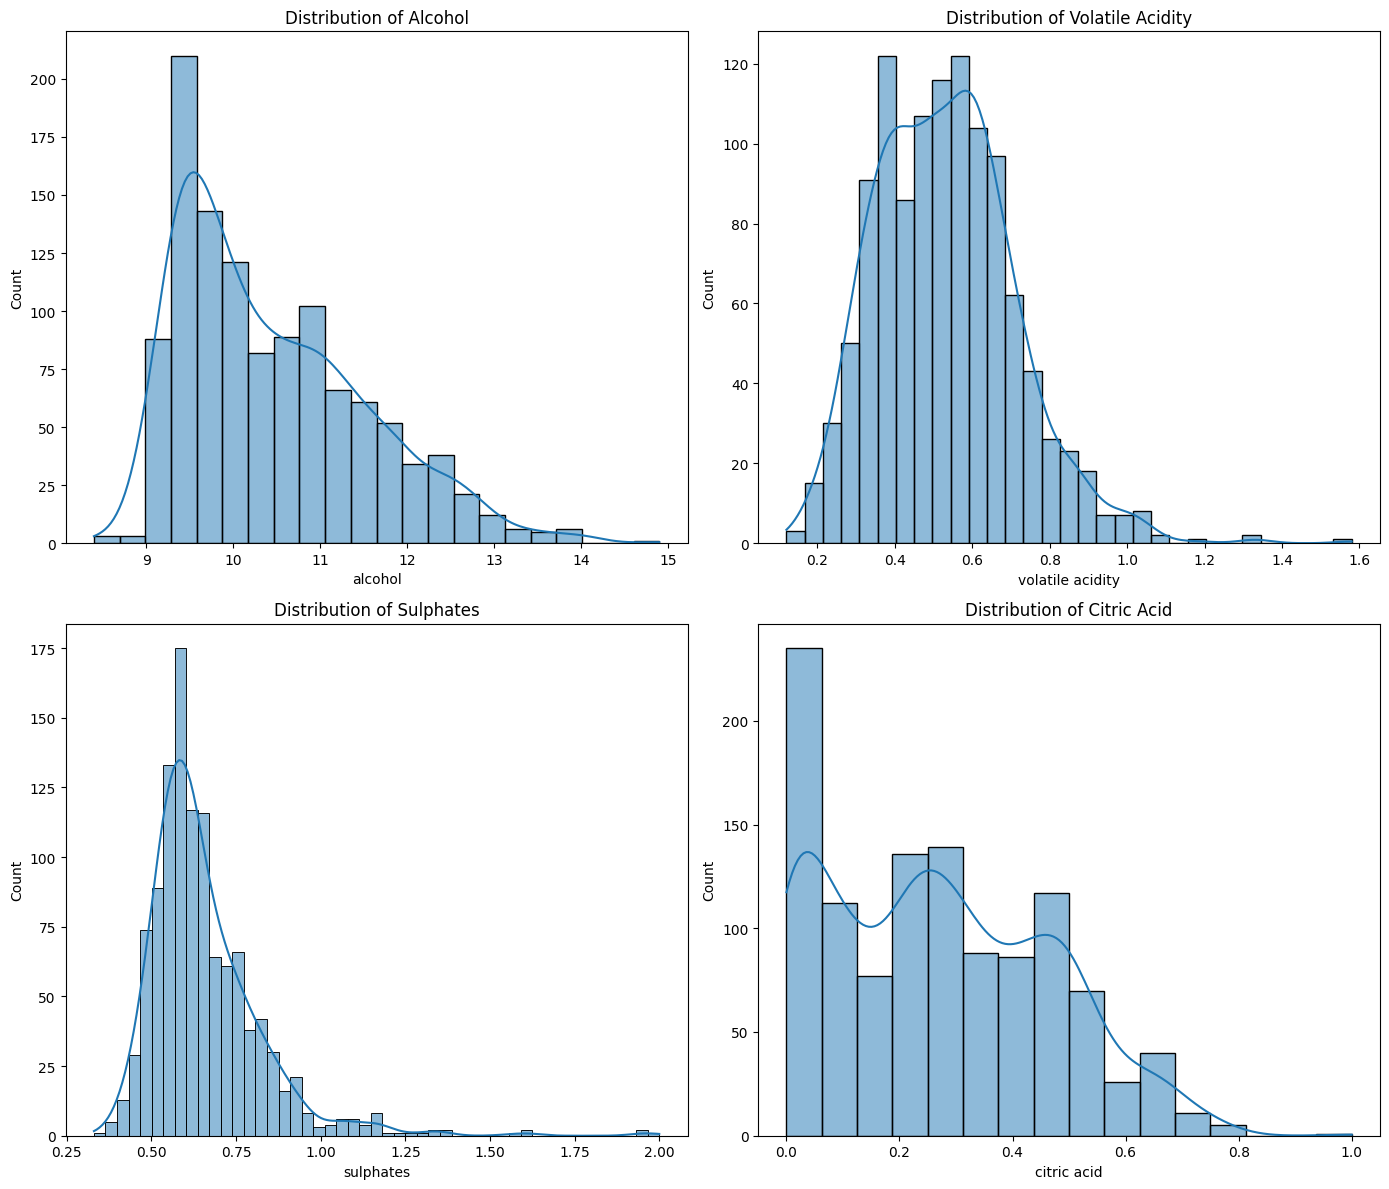

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

sns.histplot(data['alcohol'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Alcohol')

sns.histplot(data['volatile acidity'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Volatile Acidity')

sns.histplot(data['sulphates'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Sulphates')

sns.histplot(data['citric acid'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Citric Acid')

plt.tight_layout()
plt.show()

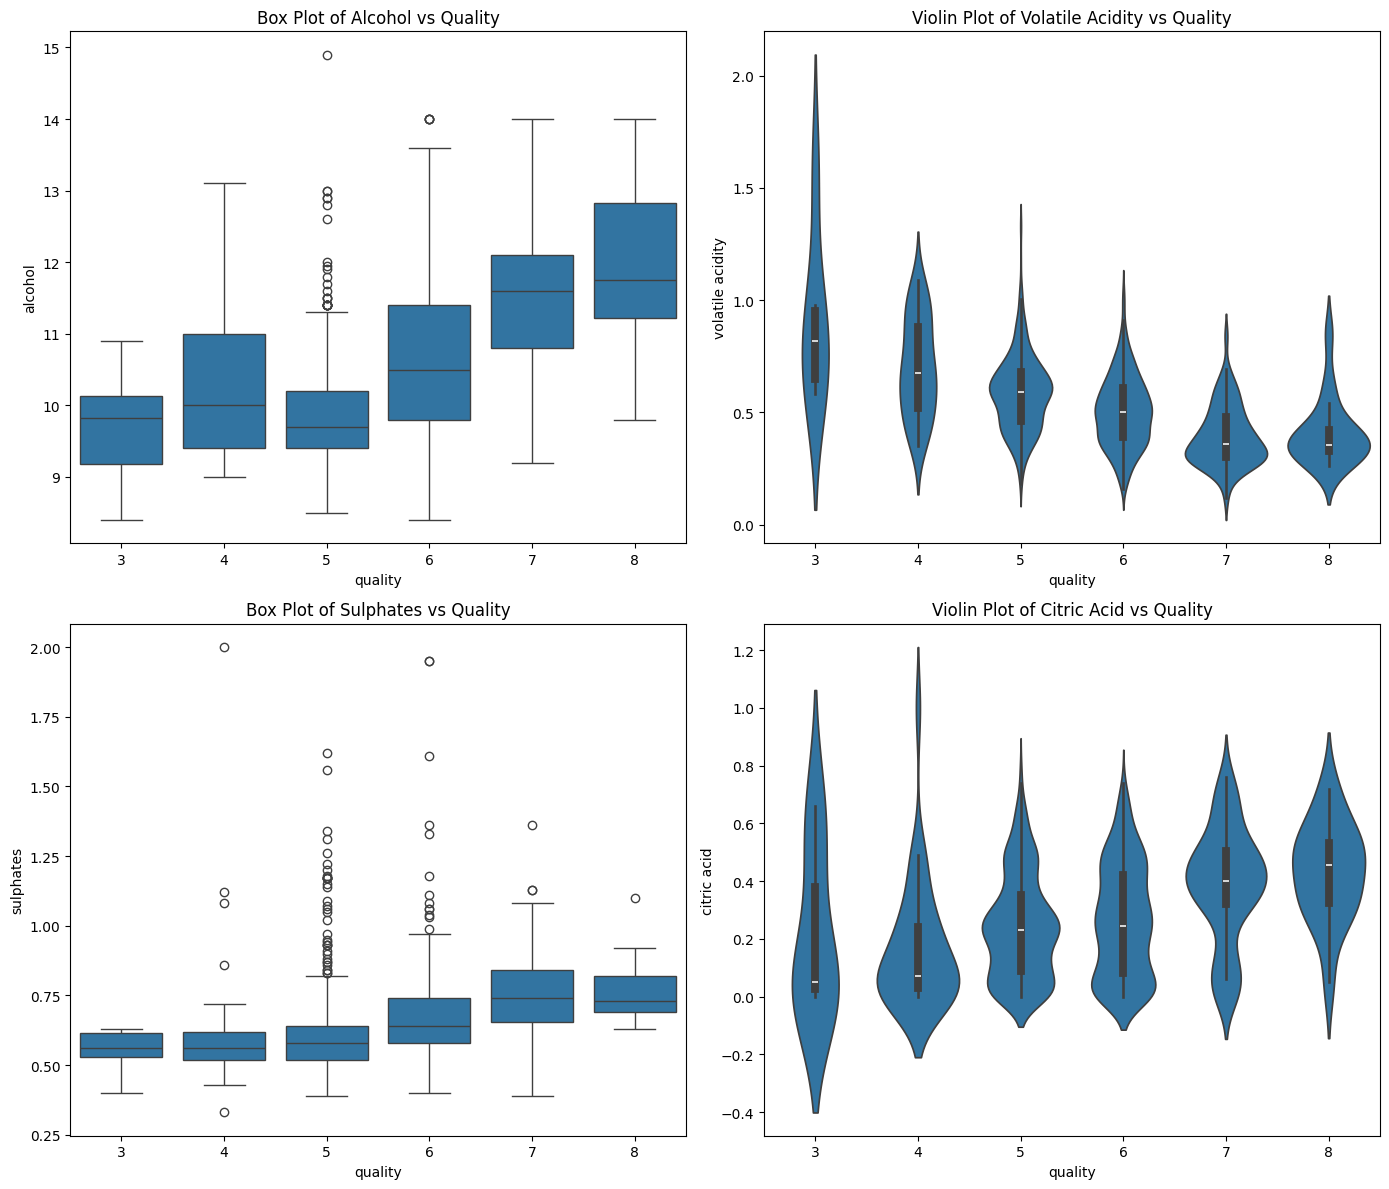

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

sns.boxplot(x='quality', y='alcohol', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Box Plot of Alcohol vs Quality')

sns.violinplot(x='quality', y='volatile acidity', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Violin Plot of Volatile Acidity vs Quality')

sns.boxplot(x='quality', y='sulphates', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of Sulphates vs Quality')

sns.violinplot(x='quality', y='citric acid', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Violin Plot of Citric Acid vs Quality')

plt.tight_layout()
plt.show()

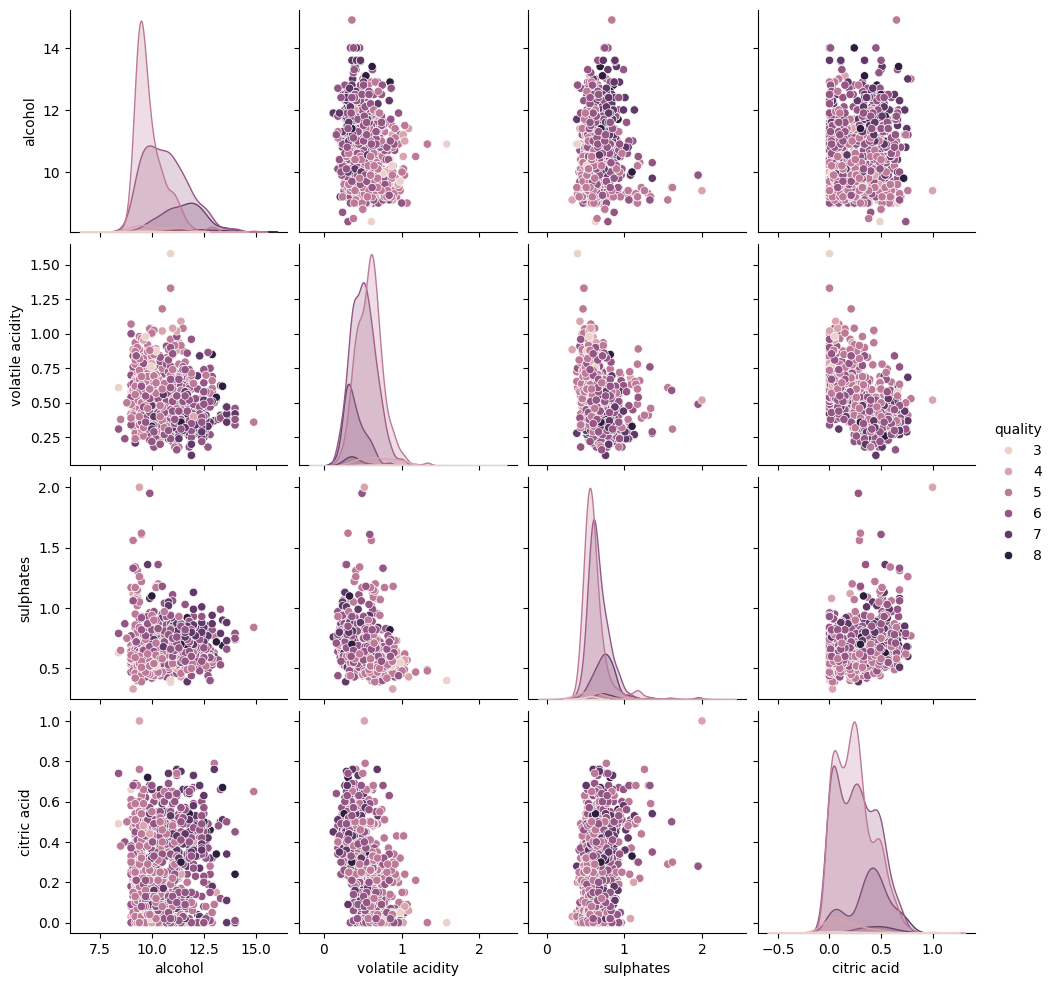

In [10]:
selected_columns = data[['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'quality']]
sns.pairplot(selected_columns, hue='quality')
plt.show()

## Feature Engineering and Selection

In [40]:
data['alcohol_x_volatile_acidity'] = data['alcohol'] * data['volatile acidity']

poly = PolynomialFeatures(degree=2)
features = poly.fit_transform(data[['alcohol', 'sulphates']])

In [41]:
selector = SelectKBest(score_func=f_regression, k=5)
selector.fit(data.drop('quality', axis=1), data['quality'])
best_features = data.drop('quality', axis=1).columns[selector.get_support()]

print("Best Features:", best_features)

Best Features: Index(['volatile acidity', 'citric acid', 'sulphates', 'alcohol',
       'alcohol_x_volatile_acidity'],
      dtype='object')


In [42]:
data[best_features].sample(10)

,volatile acidity,citric acid,sulphates,alcohol,alcohol_x_volatile_acidity
169,0.58,0.10,0.49,9.8,5.684
987,0.64,0.22,0.58,11.0,7.040
354,0.52,0.25,0.65,9.0,4.680
103,0.52,1.00,2.00,9.4,4.888
1051,0.50,0.50,0.75,8.8,4.400
368,0.61,0.49,0.63,8.4,5.124
639,0.59,0.06,0.59,10.8,6.372
382,0.35,0.49,0.66,12.0,4.200
849,0.34,0.36,0.54,11.2,3.808
198,0.40,0.32,0.77,10.5,4.200


## Splitting Data and SMOTE

In [43]:
X = data[best_features]
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print("Distribution of target classes after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

Distribution of target classes after SMOTE:
quality
5    362
7    362
6    362
4    362
8    362
3    362
Name: count, dtype: int64


## Machine Learning and Boosting

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.feature_selection import SelectKBest, f_classif

class_models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

param_grid = {
    'KNN': {'n_neighbors': [3, 5, 7, 10, 15], 'weights': ['uniform', 'distance']},
    'SVM': {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'poly', 'rbf'], 'gamma': ['scale', 'auto']},
    'Decision Tree': {'max_depth': [5, 10, 15, 20], 'min_samples_leaf': [1, 2, 4, 6], 'criterion': ['gini', 'entropy']},
    'Random Forest': {'n_estimators': [50, 100, 200, 300], 'max_depth': [5, 10, 20], 'min_samples_split': [2, 5, 10]},
}

In [47]:
results = []
for name, model in class_models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5)
    grid_search.fit(X_train_smote, y_train_smote)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    unique_classes = np.unique(y_train)
    class_names = [f'Class {label}' for label in unique_classes]

    cr = classification_report(y_test, y_pred, target_names=class_names, zero_division=0)
    print(f"{name} Classification Report:\n{cr}")

    results.append((name, grid_search.best_params_, accuracy, f1))

results_df = pd.DataFrame(results, columns=['Model', 'Best Params', 'Accuracy', 'F1 Score'])
print(results_df)

KNN Classification Report:
              precision    recall  f1-score   support

     Class 3       0.00      0.00      0.00         0
     Class 4       0.05      0.29      0.09         7
     Class 5       0.64      0.47      0.54       121
     Class 6       0.59      0.42      0.49       121
     Class 7       0.48      0.62      0.54        34
     Class 8       0.07      0.33      0.11         3

    accuracy                           0.46       286
   macro avg       0.30      0.35      0.30       286
weighted avg       0.58      0.46      0.50       286

SVM Classification Report:
              precision    recall  f1-score   support

     Class 3       0.00      0.00      0.00         0
     Class 4       0.03      0.14      0.04         7
     Class 5       0.62      0.53      0.57       121
     Class 6       0.61      0.39      0.47       121
     Class 7       0.48      0.62      0.54        34
     Class 8       0.07      0.33      0.12         3

    accuracy           

In [51]:
encoder = LabelEncoder()

y_encoded = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train_smote, y_train_smote)
y_pred_xgb = xgb_model.predict(X_test_scaled)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         6
           2       0.70      0.68      0.69        96
           3       0.64      0.49      0.56        99
           4       0.47      0.73      0.58        26
           5       0.10      0.50      0.17         2

    accuracy                           0.59       229
   macro avg       0.32      0.40      0.33       229
weighted avg       0.63      0.59      0.60       229

XGBoost Accuracy: 0.5851528384279476


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
lgb_model = lgb.LGBMClassifier(random_state=42, force_col_wise=True)
lgb_model.fit(X_train_smote, y_train_smote)
y_pred_lgb = lgb_model.predict(X_test_scaled)
print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgb))
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))

[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 2322, number of used features: 5
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         6
           2       0.70      0.68      0.69        96
           3       0.65      0.52      0.57        99
           4       0.47      0.69      0.56        26
           5       0.12      0.50      0.20         2

    accuracy                           0.59       229
   macro a

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Neural Network

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [56]:
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
23/23 [==============================] - 1s 17ms/step - loss: 1.5781 - accuracy: 0.4583 - val_loss: 1.4015 - val_accuracy: 0.5410
Epoch 2/50
23/23 [==============================] - 0s 5ms/step - loss: 1.3117 - accuracy: 0.5130 - val_loss: 1.2137 - val_accuracy: 0.5301
Epoch 3/50
23/23 [==============================] - 0s 5ms/step - loss: 1.1726 - accuracy: 0.5445 - val_loss: 1.1136 - val_accuracy: 0.5301
Epoch 4/50
23/23 [==============================] - 0s 6ms/step - loss: 1.1048 - accuracy: 0.5732 - val_loss: 1.0715 - val_accuracy: 0.5191
Epoch 5/50
23/23 [==============================] - 0s 5ms/step - loss: 1.0658 - accuracy: 0.5814 - val_loss: 1.0343 - val_accuracy: 0.5410
Epoch 6/50
23/23 [==============================] - 0s 5ms/step - loss: 1.0416 - accuracy: 0.5923 - val_loss: 1.0223 - val_accuracy: 0.5519
Epoch 7/50
23/23 [==============================] - 0s 5ms/step - loss: 1.0230 - accuracy: 0.6074 - val_loss: 1.0086 - val_accuracy: 0.5464
Epoch 8/50
23/23 [=

In [57]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.5938864350318909
